66 images loaded


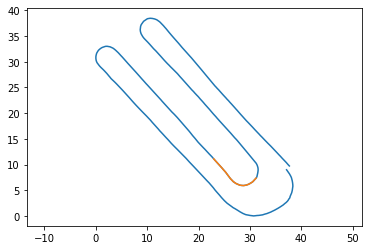

In [3]:
import math
import matplotlib.pyplot as plt
import navbench

entries = navbench.read_image_database("databases/newton_agritech_tractor_image_databases/route1")
dby = entries["y"]
dbx = entries["x"]

MAX_DIST = 5 # metres
START_FR = 5000
IMSIZE   = (360, 110)
FRSKIP   = 10

# Euclidean distance between two database entries (in m)
def get_distance(entry1, entry2):
    return math.hypot(dby[entry1]-dby[entry2], dbx[entry1]-dbx[entry2])


# Get upper and lower bounds for frames > max_dist from start frame
def get_fr_bounds(max_dist, start_fr):
    upper_fr = start_fr
    while get_distance(start_fr, upper_fr) < max_dist:
        upper_fr += 1
    lower_fr = start_fr - 1
    while get_distance(start_fr, lower_fr) < max_dist:
        lower_fr -= 1
    return (lower_fr, upper_fr)


(lower_fr, upper_fr) = get_fr_bounds(MAX_DIST, START_FR)

# Get distances from start point
dists = []
for i in range(lower_fr, upper_fr, FRSKIP):
    dist = get_distance(START_FR, i)
    dists.append(dist if i >= START_FR else -dist)

# Load snapshot and test images
snap = navbench.read_image(entries["filepath"][START_FR], IMSIZE)
images = navbench.read_images(entries["filepath"][lower_fr:upper_fr:FRSKIP], IMSIZE)
print(images.shape[2], "images loaded")

# Show which part of route we're testing
plt.plot(dbx, dby, dbx[lower_fr:upper_fr], dby[lower_fr:upper_fr])
plt.axis("equal")
plt.show()

0.002081897405426472


(0.0, 0.06)

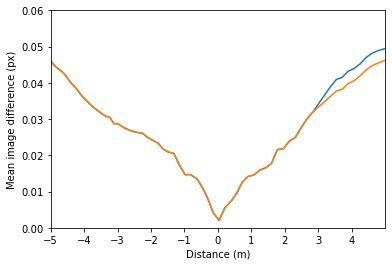

In [6]:
RIDF_STEP = 2

idf_diffs = navbench.get_route_idf(images, snap)
ridf_diffs = navbench.get_route_ridf(images, snap, RIDF_STEP)
print(min(ridf_diffs))

plt.plot(dists, idf_diffs, dists, ridf_diffs)
plt.xlabel("Distance (m)")
plt.xlim(-MAX_DIST, MAX_DIST)
plt.xticks(range(-5, 5))
plt.ylabel("Mean image difference (px)")
plt.ylim(0, 0.06)